<a href="https://colab.research.google.com/github/Upendra4204/Upendra4204/blob/main/wine_quality_checking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving wines_SPA.csv to wines_SPA.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data=pd.read_csv('wines_SPA.csv')
df=pd.DataFrame(data)
df.head(10)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
5,Vega Sicilia,Unico,1998,4.8,1209,Espana,Ribera del Duero,490.00,Ribera Del Duero Red,5.0,3.0
6,Vega Sicilia,Unico,2010,4.8,1201,Espana,Ribera del Duero,349.00,Ribera Del Duero Red,5.0,3.0
7,Vega Sicilia,Unico,1995,4.8,926,Espana,Ribera del Duero,810.89,Ribera Del Duero Red,5.0,3.0
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643,Espana,Ribera del Duero,345.00,Ribera Del Duero Red,5.0,3.0
9,Vega Sicilia,Unico,2011,4.8,630,Espana,Ribera del Duero,315.00,Ribera Del Duero Red,5.0,3.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [28]:
cat_cols=df.select_dtypes(include='object')
num_cols=df.select_dtypes(exclude='object')

In [29]:
cat_cols

,winery,wine,year,country,region,type
0,Teso La Monja,Tinto,2013,Espana,Toro,Toro Red
1,Artadi,Vina El Pison,2018,Espana,Vino de Espana,Tempranillo
2,Vega Sicilia,Unico,2009,Espana,Ribera del Duero,Ribera Del Duero Red
3,Vega Sicilia,Unico,1999,Espana,Ribera del Duero,Ribera Del Duero Red
4,Vega Sicilia,Unico,1996,Espana,Ribera del Duero,Ribera Del Duero Red
...,...,...,...,...,...,...
7495,Contino,Reserva,2016,Espana,Rioja,Rioja Red
7496,Conreria d'Scala Dei,Les Brugueres,2018,Espana,Priorato,Priorat Red
7497,Mustiguillo,Finca Terrerazo,2017,Espana,El Terrerazo,Red
7498,Matarromera,Gran Reserva,2011,Espana,Ribera del Duero,Ribera Del Duero Red


In [30]:
cat_cols=cat_cols.drop(['country','type','winery'],axis=1)

In [31]:
cat_cols.isnull().sum()

wine      0
year      2
region    0
dtype: int64

In [32]:
for col in cat_cols:
           cat_cols[col].fillna(cat_cols[col].mode()[0],inplace=True)

In [33]:
cat_cols.isnull().sum()

wine      0
year      0
region    0
dtype: int64

In [34]:
cat_cols.nunique()

wine      847
year       71
region     76
dtype: int64

In [35]:
num_cols

,rating,num_reviews,price,body,acidity
0,4.9,58,995.00,5.0,3.0
1,4.9,31,313.50,4.0,2.0
2,4.8,1793,324.95,5.0,3.0
3,4.8,1705,692.96,5.0,3.0
4,4.8,1309,778.06,5.0,3.0
...,...,...,...,...,...
7495,4.2,392,19.98,4.0,3.0
7496,4.2,390,16.76,4.0,3.0
7497,4.2,390,24.45,4.0,3.0
7498,4.2,389,64.50,5.0,3.0


In [36]:
num_cols.isnull().sum()

rating            0
num_reviews       0
price             0
body           1169
acidity        1169
dtype: int64

In [37]:
for col in num_cols:
           num_cols[col].fillna(num_cols[col].mean(),inplace=True)

In [38]:
num_cols.isnull().sum()

rating         0
num_reviews    0
price          0
body           0
acidity        0
dtype: int64

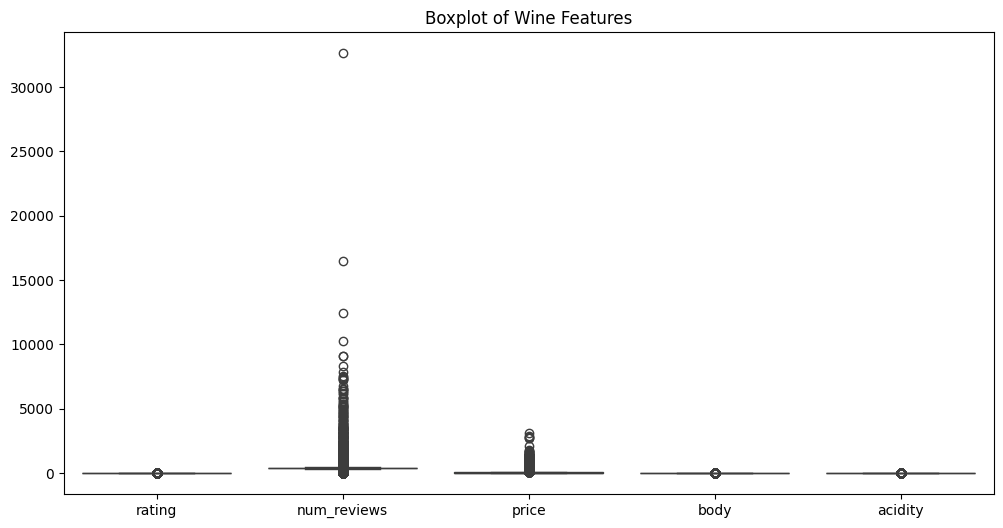

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_cols)
plt.title('Boxplot of Wine Features')
plt.show()

Text(0.5, 1.0, 'For rating')

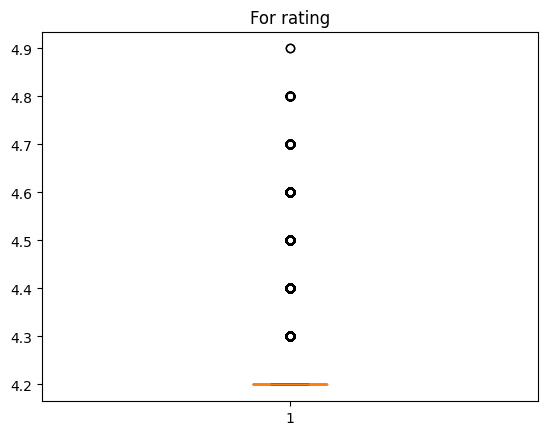

In [40]:
plt.boxplot(num_cols['rating'])
plt.title('For rating')

Text(0.5, 1.0, ' For num_reviews')

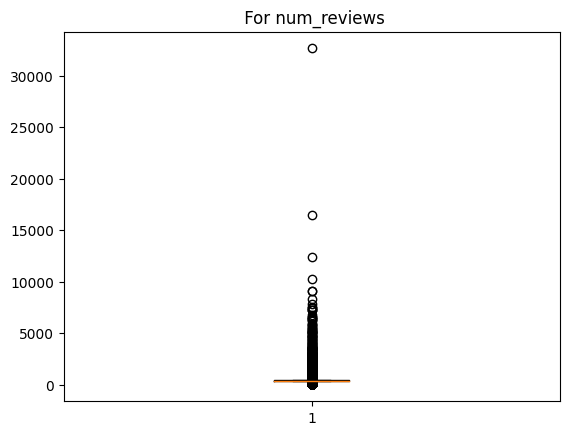

In [41]:
plt.boxplot(num_cols['num_reviews'])
plt.title(' For num_reviews')

Text(0.5, 1.0, 'For price')

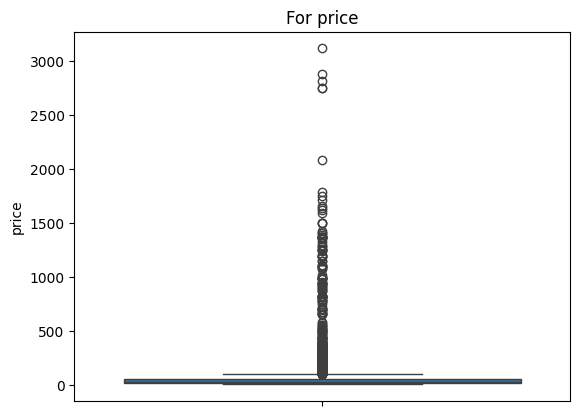

In [42]:
sns.boxplot(num_cols['price'])
plt.title('For price')

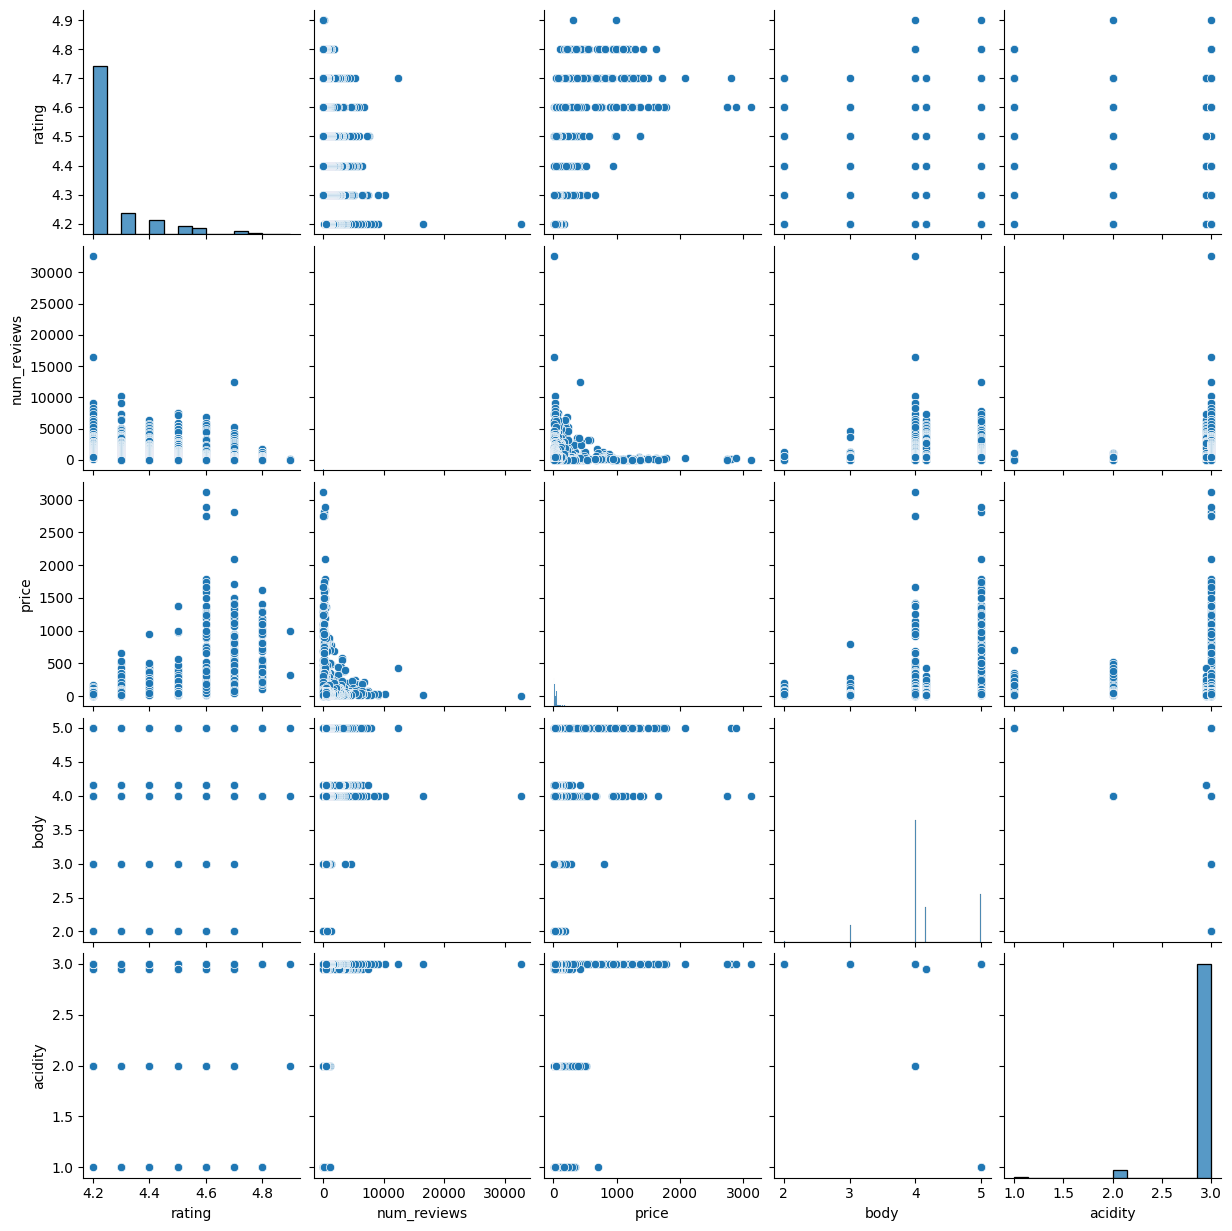

In [43]:

sns.pairplot(num_cols)

<Axes: >

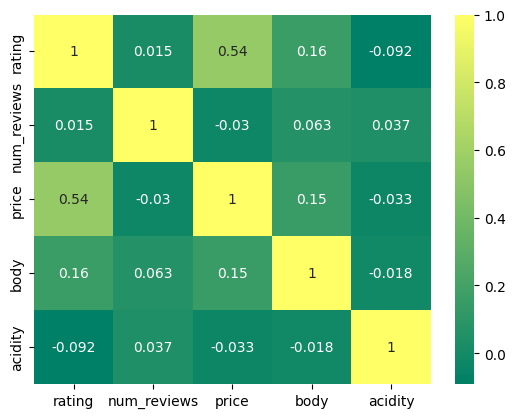

In [44]:
corr_matrix=num_cols.corr()
sns.heatmap(corr_matrix,annot=True,cmap='summer')

In [45]:
num_cols=num_cols.drop(['acidity','num_reviews'],axis=1)

In [46]:
encoded_cat_cols=pd.get_dummies(cat_cols)
encoded_cat_cols

,wine_1194,wine_17,wine_1730 Amontillado,wine_1730 Pedro Ximenez,wine_1902 Centenary Carignan Priorat,wine_1903 Centenary Grenache,wine_200 Cestos Godello,wine_200 Monges Edicion Exclusiva Blanco Reserva,wine_200 Monges Rioja Gran Reserva,wine_200 Monges Rioja Reserva,...,region_Tarragona,region_Terra Alta,region_Tierra del Vino de Zamora,region_Toro,region_Utiel-Requena,region_Valdejalon,region_Valdeorras,region_Valencia,region_Vino de Espana,region_Yecla
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df=pd.concat([num_cols,encoded_cat_cols],axis=1)
df.head()

,rating,price,body,wine_1194,wine_17,wine_1730 Amontillado,wine_1730 Pedro Ximenez,wine_1902 Centenary Carignan Priorat,wine_1903 Centenary Grenache,wine_200 Cestos Godello,...,region_Tarragona,region_Terra Alta,region_Tierra del Vino de Zamora,region_Toro,region_Utiel-Requena,region_Valdejalon,region_Valdeorras,region_Valencia,region_Vino de Espana,region_Yecla
0,4.9,995.00,5.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,4.9,313.50,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4.8,324.95,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.8,692.96,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.8,778.06,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
q1=num_cols.quantile(0.20)
q3=num_cols.quantile(0.80)
outlier_mask=((num_cols<q1)|(num_cols>q3)).any(axis=1)
new_df=df[~outlier_mask]
new_df

,rating,price,body,wine_1194,wine_17,wine_1730 Amontillado,wine_1730 Pedro Ximenez,wine_1902 Centenary Carignan Priorat,wine_1903 Centenary Grenache,wine_200 Cestos Godello,...,region_Tarragona,region_Terra Alta,region_Tierra del Vino de Zamora,region_Toro,region_Utiel-Requena,region_Valdejalon,region_Valdeorras,region_Valencia,region_Vino de Espana,region_Yecla
1114,4.3,24.38,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1115,4.3,20.00,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1118,4.3,37.90,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1120,4.3,24.95,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1121,4.3,29.90,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7493,4.2,48.96,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7494,4.2,61.94,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7495,4.2,19.98,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,4.2,24.45,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
new_df['rating'].value_counts(normalize=True)

4.2    0.894191
4.3    0.105809
Name: rating, dtype: float64

In [50]:
new_df['rating']=new_df['rating'].map({4.2:0,
                                      4.3:1})

<ipython-input-50-82f1dd501032>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['rating']=new_df['rating'].map({4.2:0,


In [51]:
new_df.head()

,rating,price,body,wine_1194,wine_17,wine_1730 Amontillado,wine_1730 Pedro Ximenez,wine_1902 Centenary Carignan Priorat,wine_1903 Centenary Grenache,wine_200 Cestos Godello,...,region_Tarragona,region_Terra Alta,region_Tierra del Vino de Zamora,region_Toro,region_Utiel-Requena,region_Valdejalon,region_Valdeorras,region_Valencia,region_Vino de Espana,region_Yecla
1114,1,24.38,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1115,1,20.00,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1118,1,37.90,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1120,1,24.95,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1121,1,29.90,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X=new_df.drop(['rating'],axis=1)
y=new_df['rating']

In [53]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [55]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [57]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('decision tree classifier accuracy:',accuracy_dt)

decision tree classifier accuracy: 0.9492753623188406


In [58]:
rf =RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_dt)
print('random forest classifier accuracy:',accuracy_rf)

random forest classifier accuracy: 0.9492753623188406


In [59]:
from xgboost import XGBClassifier

In [60]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_xgb

0.6818840579710145